# Data Science Intern at LetsGrowMore

# Author:Madhuri Prasad

# TASK-01 Iris Flowers Classification ML Project

# Dataset link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

# Importing the necessary package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics  import accuracy_score,classification_report,confusion_matrix




# Loading the dataset

In [3]:
data=pd.read_csv('iris.data',header=None)

In [3]:
data.head()  # used for getting the  top 5 values

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
columns=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class']
data.columns=columns

In [5]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring the Data

In [6]:
data.info()  # The info() function here is used to display a concise summary of the  DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.shape     #Returns size of dataframe/series which is equivalent to total number of elements like (rows,columns).

(150, 5)

In [8]:
data.keys()

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [9]:
data.describe()   #It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
print(data['class'].unique())   # used unique function to get  feature column.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
data.dtypes # dtypes i

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [4]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [13]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
data.count() #count function is used for getting all entries from the columns

sepal_length_cm    150
sepal_width_cm     150
petal_length_cm    150
petal_width_cm     150
class              150
dtype: int64

#                                       # Data Visualization

#                               1.    Scatter plot

<AxesSubplot:xlabel='sepal_length_cm', ylabel='class'>

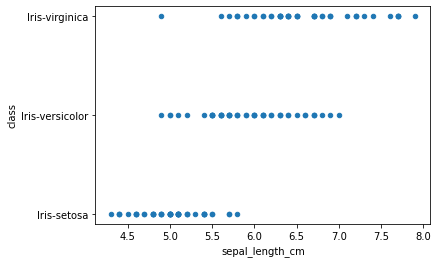

In [15]:
data.plot(kind="scatter",x='sepal_length_cm',y='class')

<AxesSubplot:xlabel='sepal_width_cm', ylabel='class'>

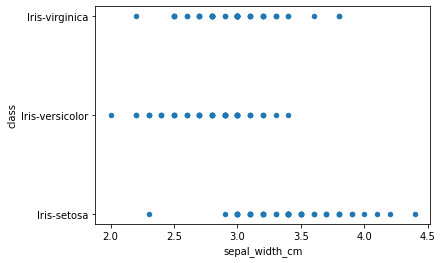

In [16]:
data.plot(kind="scatter",x='sepal_width_cm',y='class')

<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_length_cm'>

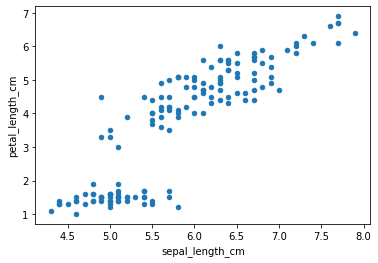

In [17]:
data.plot(kind="scatter",x='sepal_length_cm',y='petal_length_cm')

<AxesSubplot:xlabel='sepal_width_cm', ylabel='petal_length_cm'>

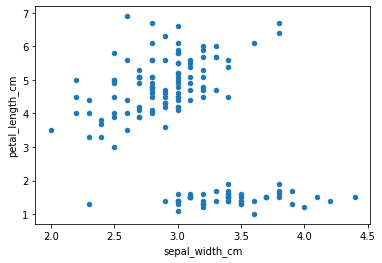

In [18]:
data.plot(kind="scatter",x='sepal_width_cm',y='petal_length_cm')

<AxesSubplot:xlabel='petal_length_cm', ylabel='class'>

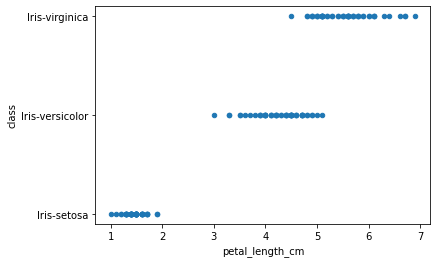

In [20]:
data.plot(kind="scatter",x='petal_length_cm',y='class')

#                                   2.   Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1be9eb5bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1be9eb6e700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be9eb5bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1be9eb6ee20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be9eb7c1f0>],
 'means': []}

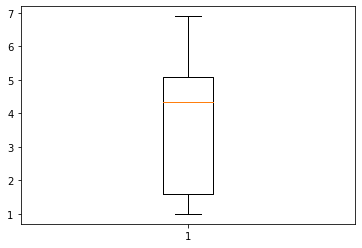

In [22]:
plt.boxplot(data["petal_length_cm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1be9ebda310>,
 'caps': [<matplotlib.lines.Line2D at 0x1be9ebdaa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be9ebcbf40>],
 'medians': [<matplotlib.lines.Line2D at 0x1be9ebe6190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be9ebe6520>],
 'means': []}

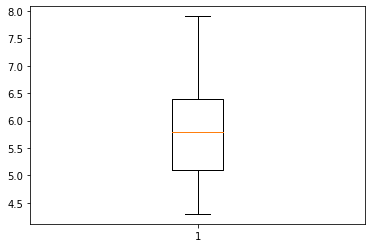

In [23]:
plt.boxplot(data["sepal_length_cm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1be9ec40a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1be9ec4f130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be9ec406d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1be9ec4f850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be9ec4fbe0>],
 'means': []}

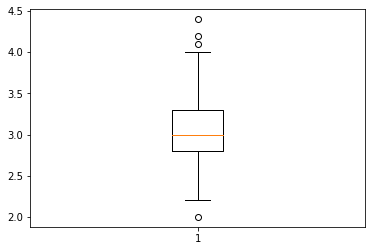

In [24]:
plt.boxplot(data["sepal_width_cm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1be9ecaf640>,
 'caps': [<matplotlib.lines.Line2D at 0x1be9ecafd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be9ecaf3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1be9ecba490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be9ecba820>],
 'means': []}

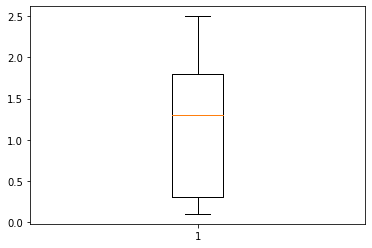

In [25]:
plt.boxplot(data["petal_width_cm"])

#           3.    histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

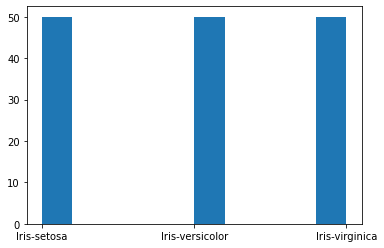

In [26]:
plt.hist(data["class"])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

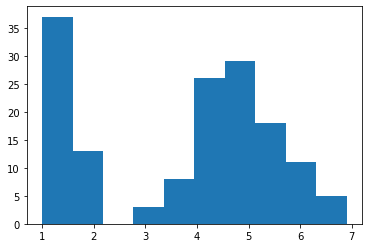

In [27]:
plt.hist(data["petal_length_cm"])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

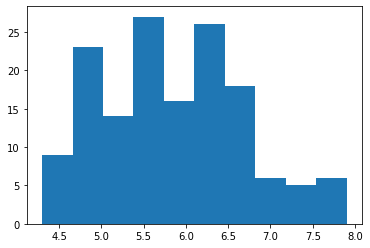

In [29]:
plt.hist(data["sepal_length_cm"])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

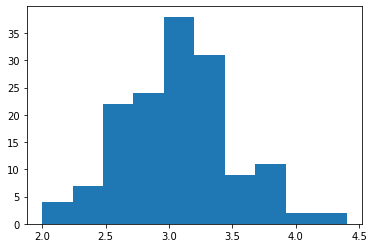

In [30]:
plt.hist(data["sepal_width_cm"])

#                                 4.pair plot

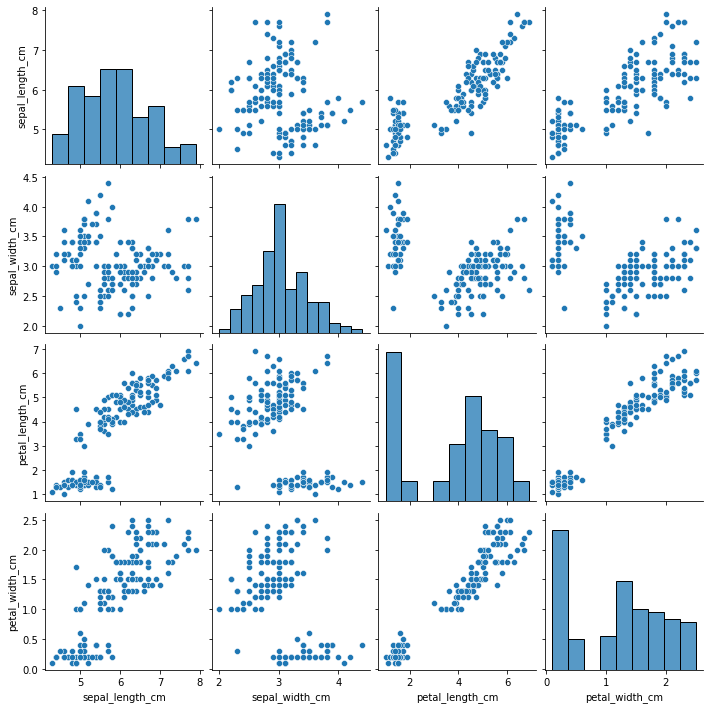

In [32]:
sns.pairplot(data)

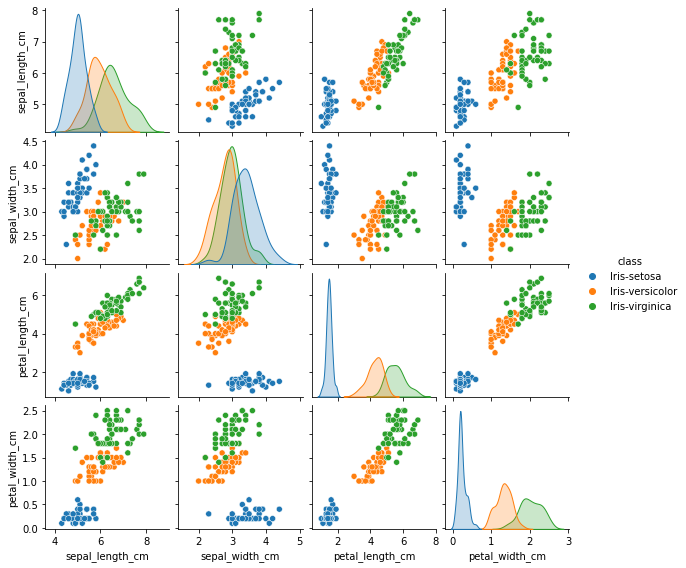

In [33]:
sns.pairplot(data,hue="class" ,height=2)

#   Exploratory Data Analysis

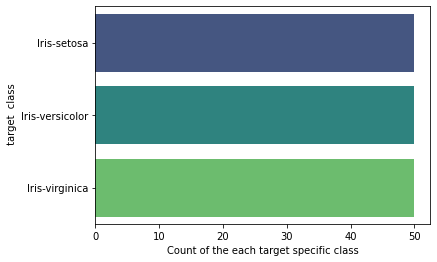

In [35]:
sns.countplot(y='class',data=data,palette="viridis")
plt.xlabel("Count of the each target specific class")
plt.ylabel(" target  class")
plt.show()

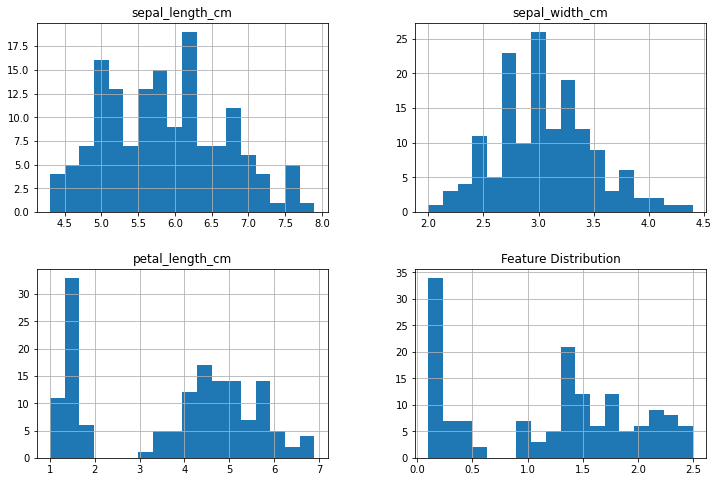

In [36]:
# checking and displaying the distribution of all the features
data.hist(figsize=(12,8),bins=18)
plt.title("Feature Distribution")
plt.show()

In [37]:
# correlating the data
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


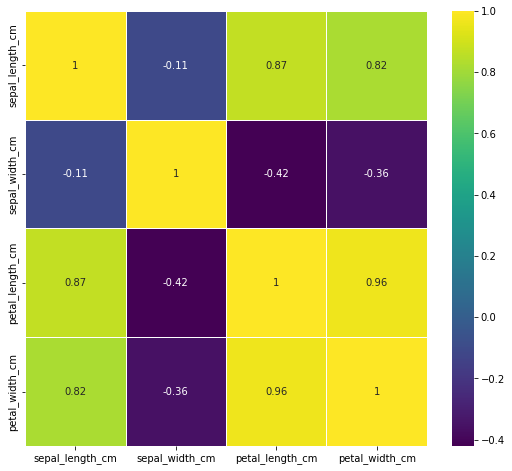

In [38]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),annot=True,cmap="viridis",linewidth=0.5)
plt.show()

#    Splitting the Data

In [42]:
X=data.drop('class',axis=1)
y=data['class']

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, random_state=0,test_size=0.33)

#               Devloping the Model

In [47]:
knn_model= KNeighborsClassifier()
log_model=LogisticRegression()


knn_model.fit(X_train,y_train)
log_model.fit(X_train,y_train)

LogisticRegression()

#   Model Prediction

In [48]:
knn_predict=knn_model.predict( X_test)
log_predict=log_model.predict( X_test)

# 1.Accuracy

In [49]:
print(f"""
KNN Accuracy: {accuracy_score(y_test,knn_predict)}),
LogisticRegression Accuracy: {accuracy_score(y_test,log_predict)}
""")


KNN Accuracy: 0.98),
LogisticRegression Accuracy: 0.98



# 2. Confusion Matrix

In [51]:
print(f"""
KNN Confusion matrix:
{confusion_matrix(y_test,knn_predict)}),
LogisticRegression  Confusion matrix:
{confusion_matrix(y_test,log_predict)}
""")


KNN Confusion matrix:
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]]),
LogisticRegression  Confusion matrix:
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]]



# 3.Classification Report

In [52]:
print(f"""
KNN Classification Report:
{classification_report(y_test,knn_predict)}),
LogisticRegression  Classification Report:
{classification_report(y_test,log_predict)}
""")


KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50
),
LogisticRegression  Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50




# Conclusion